Assignment 1
COMP 5630 Machin Learning
Jacob Martin
2/10/25

# README

Used Libraries:

Matplotlib
Numpy
Pandas
Seaborn

# Question 1

Suppose that you are conducting a scientific experiment where you are observing the effects of one variable (x_train.npy and x_test.npy) on the output (y_train.npy and y_test.npy). On visualizing the relationship between the variables, you see the following plot:
Your goal is to come up with a linear regression model that can take the training data (x_train.npy and y_train.npy) and model the relationship between the variables x and y. You should implement your own version of linear regression either using gradient descent or normal equations. You SHOULD NOT use any pre-packaged library such as Sci-Kit Learn.
Here are somethings to keep in mind for tackling this problem:
1. Try to plot this relationship on your own using matplotlib. You can also visualize the test data
to see if it gives you any clues about the underlying relationship between the variables.
2. Use your knowledge gleaned from the previous step to answer the following questions:
a. Is the relationship linear?
b. Do you need feature engineering to add any non-linearity?
i. If so, how can you engineer these features?
ii. What are some functions that you can try?
1. Plot each of them individually to verify!
You will need to write a short report detailing your thought process, the code you wrote in Python to
implement the linear regression model and the equation that models the relationship between x and y that you found. You should provide evidence that corroborates your final statement such as plots, prediction errors, etc.

### Visualizing Dataset

In [1]:
import numpy as np

# Shape of numpys
x_train = np.load('x_train.npy')
print("Training data shape:", x_train.shape)
y_train = np.load('y_train.npy')
print("Training labels data shape:", y_train.shape)
x_test = np.load('x_test.npy')
print("Test data shape:", x_test.shape)
y_test = np.load('y_test.npy')
print("Test labels data shape:", y_test.shape)

Training data shape: (100,)
Training labels data shape: (100,)
Test data shape: (100,)
Test labels data shape: (100,)


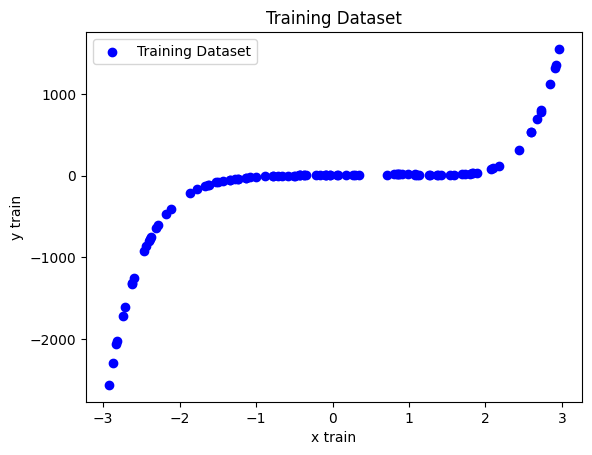

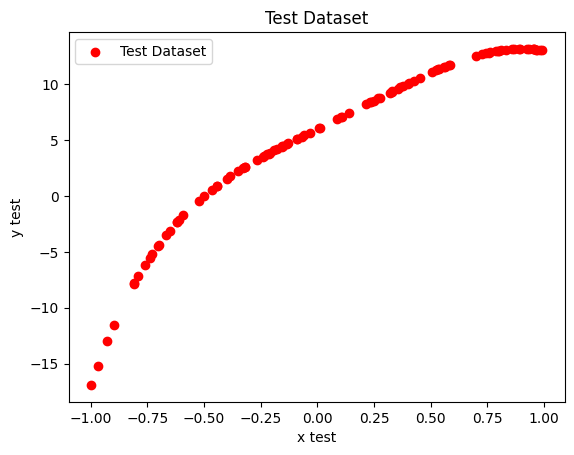

In [2]:
# Visualizing training graph with Matplotlib
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, label='Training Dataset', c='blue')
plt.xlabel('x train')
plt.ylabel('y train')
plt.title('Training Dataset')
plt.legend()
plt.show()

plt.scatter(x_test, y_test,label='Test Dataset', c='red')
plt.xlabel('x test')
plt.ylabel('y test')
plt.title('Test Dataset')
plt.legend()
plt.show()

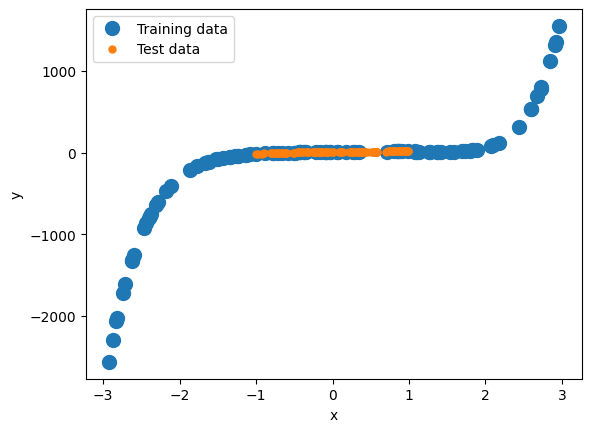

In [3]:
# Overlaying both test and training datasets
plt.plot(x_train, y_train, 'o', label='Training data', markersize=10)
plt.plot(x_test, y_test, 'o', label='Test data', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Linear Regression

Using a gradient descent function to train on dataset.

In [4]:
import numpy as np

def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 100
    n = len(x)
    learning_rate = 0.001
    for i in range(iterations):
        # predicted value
        y_predicted = m_curr * x + b_curr

        # calculates slope for m and b
        m_derivative = -sum(x * (y - y_predicted))
        b_derivative = -sum(y - y_predicted)

        # Update m and b with learning rate
        m_curr = m_curr - learning_rate * m_derivative
        b_curr = b_curr - learning_rate * b_derivative

        # calculate cost using MSE (Mean Squared Error)
        cost = (1/2) * sum([val ** 2 for val in (y - y_predicted)])
        if i % 10 == 0:
          print("m {}, b {}, iteration {}, cost {}".format(m_curr, b_curr, i, cost ))
    return m_curr, b_curr
X = x_train
y = y_train

m, b = gradient_descent(X, y)


m 88.1123346496907, b -13.99240514593797, iteration 0, cost 22628088.650225297
m 295.1777035878207, b -77.88761509582434, iteration 10, cost 8703336.176983371
m 300.9670948056403, b -96.37162281392828, iteration 20, cost 8647032.670522664
m 300.81537049169464, b -102.73504885727063, iteration 30, cost 8641856.551605782
m 300.69073962695177, b -104.96604490202728, iteration 40, cost 8641219.791255206
m 300.6446331456398, b -105.74956634094417, iteration 50, cost 8641141.227587543
m 300.6283617769075, b -106.02478141339971, iteration 60, cost 8641131.534134613
m 300.6226438180505, b -106.12145325263955, iteration 70, cost 8641130.338123107
m 300.6206352480726, b -106.15541017690751, iteration 80, cost 8641130.1905551
m 300.6199297155783, b -106.16733787852553, iteration 90, cost 8641130.172347652


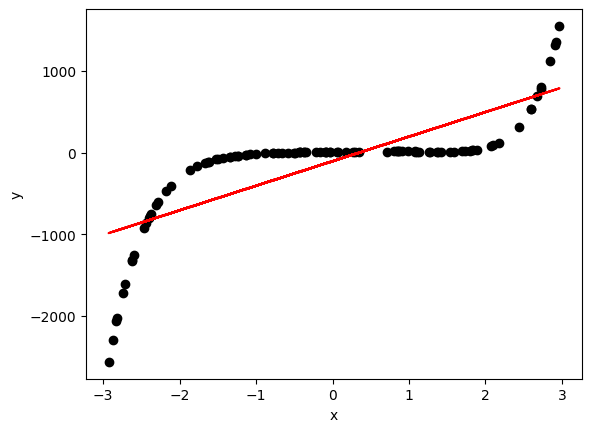

In [5]:
# Plotting the line with the weight(m) and bia(b) found from the gradient descent.
plt.scatter(x_train, y_train, color='black')
plt.plot(x_train, m*x_train + b, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
# Testing the model parameters
y_pred = m*x_test + b
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error on test data (Gradient Descent):", mse)

Mean Squared Error on test data (Gradient Descent): 35280.94077689945


In [7]:
# Solving for theta using Normal Equations
X = np.column_stack((np.ones(len(x_train)), x_train))
Y = y_train
theta = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(Y)
print("Theta values:", theta)


Theta values: [-106.17379612  300.61954771]


In [8]:
# Testing theta values and comparing using MSE
X_test = np.column_stack((np.ones(len(x_test)), x_test))
y_pred = X_test.dot(theta)
mse = np.mean((y_test - y_pred) ** 2)
print("MSE on Test Set (Normal Equations):", mse)

MSE on Test Set (Normal Equations): 35281.33990446922


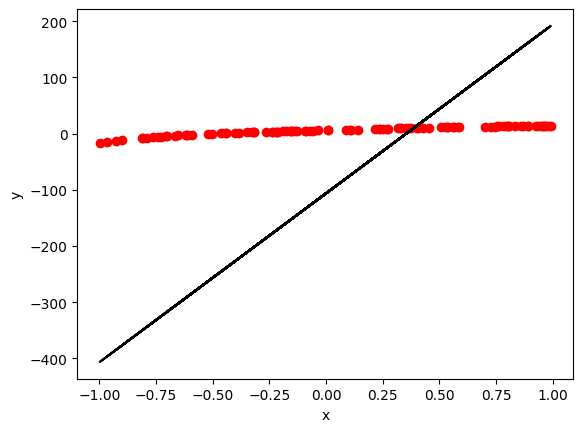

In [9]:
# Applying learned weight(m) and bias(b) onto test dataset

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, m*x_test + b, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The charts above indicate that the training and test datasets exhibit non-linear relationships. The training data follows a cubic x^3 pattern, while the test data aligns with a logarithmic function. A simple linear regression model with only a weight (m) and bias (b) is insufficient to capture these complex relationships. Consequently, when the learned model is applied to the test set, it fails to accurately predict y-values.  

I performed both gradient descent and the normal equation to train the linear regression model, which both ouputted nearly identical parameter values (m) and (b). However, due to the model’s inherent linearity, its performance on the test set remained poor. The following is my attempt at different feature engineering solutions to manipulate the training data to better fit the logarithmic function of the test dataset.


### Feature Engineering

In [10]:
# Applying polynomial features to improve the model
X_train_poly = np.column_stack((np.ones(len(x_train)), x_train, x_train**2, x_train**3))
X_test_poly = np.column_stack((np.ones(len(x_test)), x_test, x_test**2, x_test**3))

# Using Normal Equations to evaluate model
theta = np.linalg.inv(X_train_poly.T.dot(X_train_poly)).dot(X_train_poly.T).dot(y_train)
y_pred_poly_norm = X_test_poly.dot(theta)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 35281.33990446922


Text(0.5, 1.0, 'Model Predictions vs. True Values')

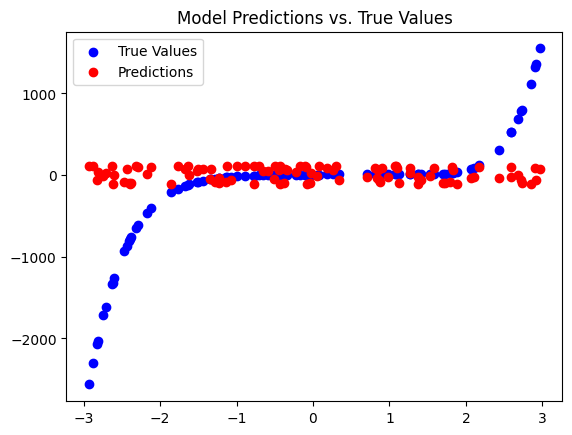

In [11]:
# Visualizing new polynomial model (normal equations) against training data
plt.scatter(x_train, y_train, color="blue", label="True Values")
plt.scatter(x_train, y_pred_poly_norm, color="red", label="Predictions")
plt.legend()
plt.title("Model Predictions vs. True Values")

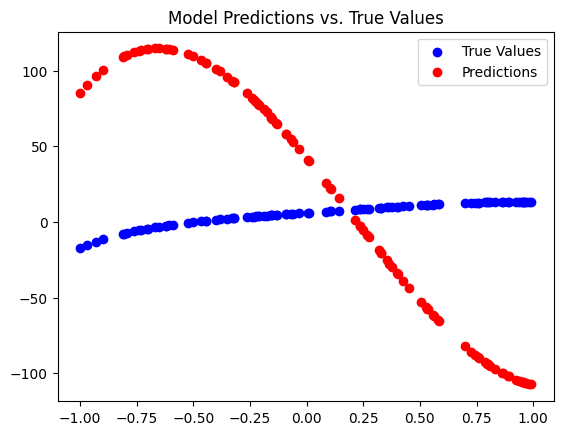

In [12]:
# Visualizing new polynomial model prediciton against test data.
plt.scatter(x_test, y_test, color="blue", label="True Values")
plt.scatter(x_test, y_pred_poly_norm, color="red", label="Predictions")
plt.legend()
plt.title("Model Predictions vs. True Values")
plt.show()


In [13]:
# Gradient Descent for Polynomial features
def gradient_descent(x, y, learning_rate=0.001, iterations=5000):
    n_samples, n_features = x.shape
    theta = np.zeros(n_features)

    for i in range(iterations):
        y_pred = x.dot(theta)
        gradients = (1/n_samples) * x.T.dot(y_pred - y)
        theta -= learning_rate * gradients

        # Cost
        cost = (1/(2*n_samples)) * np.sum((y_pred - y) ** 2)
        if i % 500 == 0:
          print(f"Iteration {i+1}: Cost = {cost}")
        elif i == iterations - 1:
          print(f"Final Iteration - {i+1}: Cost = {cost}")
    return theta

X_train_poly = np.column_stack((np.ones(len(x_train)), x_train, x_train**2, x_train**3))

theta_poly = gradient_descent(X_train_poly, y_train)
print(theta_poly)


Iteration 1: Cost = 226280.88650225292
Iteration 501: Cost = 15071.303833396541
Iteration 1001: Cost = 12849.42774463409
Iteration 1501: Cost = 11462.644009126576
Iteration 2001: Cost = 10597.02225511888
Iteration 2501: Cost = 10056.668308346572
Iteration 3001: Cost = 9719.33468267333
Iteration 3501: Cost = 9508.727839277046
Iteration 4001: Cost = 9377.230410581493
Iteration 4501: Cost = 9295.120727046919
Final Iteration - 5000: Cost = 9243.926231267158
[  38.26682026 -164.36008209  -52.70116784   83.54163167]


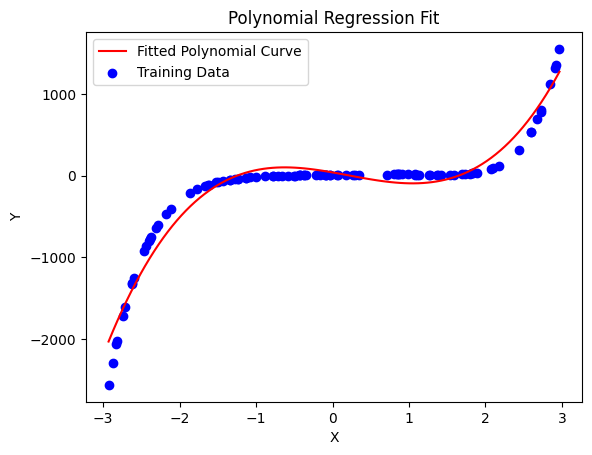

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Uses smoothing curve to have a even set of points
# x_smooth provides a dense set of points, making the fitted curve visually continuous and smooth.

# Generate test x values (smooth curve)
x_smooth = np.linspace(min(x_train), max(x_train), 100)


# Features to match the x cubed trained function
X_smooth_poly = np.column_stack((np.ones(len(x_smooth)), x_smooth, x_smooth**2, x_smooth**3))

# prediction
y_pred_smooth = X_smooth_poly.dot(theta_poly)

plt.plot(x_smooth, y_pred_smooth, color='red', label="Fitted Polynomial Curve")
plt.scatter(x_train, y_train, color='blue', label="Training Data")


plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()


Mean Squared Error: 4870.443988326719


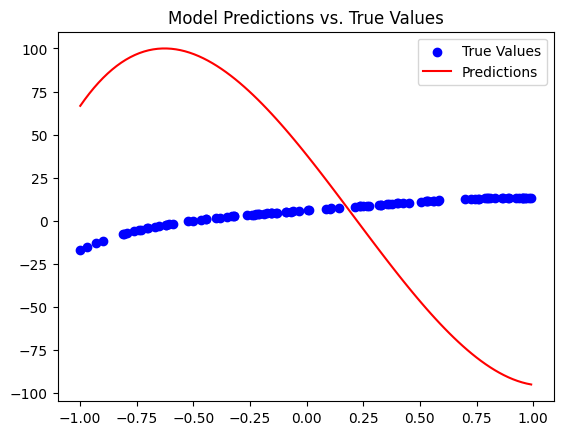

In [15]:
# Applying new polynomial weights onto test dataset
X_test_smooth = np.linspace(min(x_test), max(x_test), 100)
X_test_poly = np.column_stack((np.ones(len(X_test_smooth)), X_test_smooth, X_test_smooth**2, X_test_smooth**3))
y_pred = X_test_poly.dot(theta_poly)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error: {mse}")

# Visualizing new polynomial function onto test dataset
plt.scatter(x_test, y_test, color="blue", label="True Values")
plt.plot(X_test_smooth, y_pred, color="red", label="Predictions")
plt.legend()
plt.title("Model Predictions vs. True Values")
plt.show()



The polynomial regression model above was trained to better fit the training dataset by incorporating higher polynomial terms x^2 and x^3 , aligning with the cubic nature of the data. The learned model parameters effectively captured the training set’s patterns. However, the model performed poorly on the test dataset, highlighting the difficulty of approximating logarithmic behavior due to the fundamental disparity between the two functions. This discrepancy indicates overfitting, where the model generalized poorly on the test data.

Iteration 1: Cost = 81.64678899781246
Iteration 1001: Cost = 0.2007062376081291
Iteration 2001: Cost = 0.20070535905800355
Iteration 3001: Cost = 0.20070535905798806
Iteration 4001: Cost = 0.2007053590579883
Iteration 5001: Cost = 0.2007053590579883
Iteration 6001: Cost = 0.2007053590579883
Iteration 7001: Cost = 0.2007053590579883
Iteration 8001: Cost = 0.2007053590579883
Iteration 9001: Cost = 0.2007053590579883
Final Iteration - 10000: Cost = 0.2007053590579883
10.685439557175364 5.53941549883905


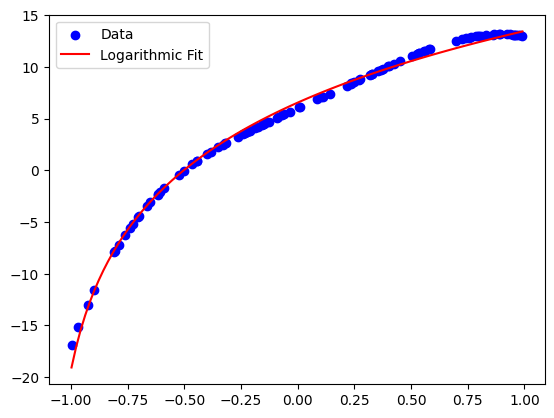

In [16]:
def gradient_descent_log(x, y, learning_rate=0.01, iterations=10000):
  x_shift = x + abs(np.min(x)) + 0.1
  a = b = 0
  for i in range(iterations):
    y_pred = a * np.log(x_shift) + b

    error = y - y_pred
    a_derivative = -2 * np.sum(error * np.log(x_shift)) / len(x)
    b_derivative = -2 * np.sum(error) / len(x)

    a -= learning_rate * a_derivative
    b -= learning_rate * b_derivative

    cost =  np.sum((error) ** 2) / len(x)
    if i % 1000 == 0:
      print(f"Iteration {i+1}: Cost = {cost}")
    elif i == iterations - 1:
      print(f"Final Iteration - {i+1}: Cost = {cost}")
  return a, b

x = x_test
y = y_test
a, b = gradient_descent_log(x, y)
print(a, b)
x_fit = np.linspace(min(x), max(x), 100)
x_fit_shifted = x_fit + abs(np.min(x)) + 0.1
y_fit = a * np.log(x_fit_shifted) + b
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_fit, y_fit, color='red', label='Logarithmic Fit')
plt.legend()
plt.show()

In order to understand the test data, I applied gradient descent to find the best parameters for a logarithmic function to capture the behavior of the test dataset. I already assumed based on its shape, that the test data represented a logarithmic function. The gradient descent performed above was to confirm that belief as well as find the best weights and biases for the test data. With this knowledge, I hope to apply onto the training data by transforming its data to logarithmic form to see if it can caputre the same behavior despite being polynomial function.

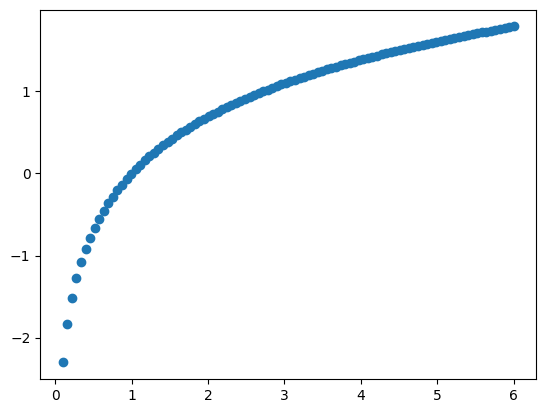

Iteration 1: Cost = 1.4822358052366393
Iteration 1001: Cost = 0.007264322702129801
Iteration 2001: Cost = 0.00724811272281645
Iteration 3001: Cost = 0.007248111562148574
Iteration 4001: Cost = 0.007248111562065475
Iteration 5001: Cost = 0.007248111562065464
Iteration 6001: Cost = 0.007248111562065467
Iteration 7001: Cost = 0.007248111562065467
Iteration 8001: Cost = 0.007248111562065467
Iteration 9001: Cost = 0.007248111562065467
Final Iteration - 10000: Cost = 0.007248111562065467
1.1895721760389266 -0.306372233368705


In [17]:
# Applying logarithmic featuers onto training dataset
# Since the dataset includes negative vaules, different techniques for handling the negative values are needed.

# 1st technique: Add constant:

# Range
# print(np.min(x_train))
# print(np.max(x_train))

x = x_train
y = y_train
x_fit = np.linspace(min(x), max(x), 100)
x_shift = x_fit + abs(np.min(x)) + 0.1
y_log = np.log(x_shift)
plt.scatter(x_shift, y_log)
plt.show()

a, b = gradient_descent_log(x_shift, y_log)
# a, b = gradient_descent_log(x_train, y_train)
print(a, b)

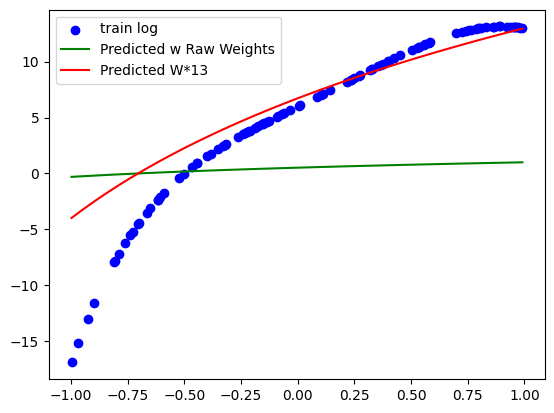

Mean Squared Error for y_pred_factored: 85.74127072300222
Mean Squared Error for y_pred: 77.7809391369435


In [18]:

plt.scatter(x_test, y_test, color='blue', label='train log')

x_fit_test = np.linspace(min(x_test), max(x_test), 100)
x_shift_test = x_fit_test + abs(np.min(x_test)) + 1
y_pred = a * np.log(x_shift_test) + b
y_pred_factored = 13*a * np.log(x_shift_test) + 13*b
plt.plot(x_fit_test, y_pred, color='green', label='Predicted w Raw Weights')
plt.plot(x_fit_test, y_pred_factored, color='red', label='Predicted W*13')
plt.legend()
plt.show()

mse_y_factored = np.mean((y_pred_factored - y_test) ** 2)
print(f"Mean Squared Error for y_pred_factored: {mse_y_factored}")

mse_y_raw = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error for y_pred: {mse_y_raw}")



1. Try to plot this relationship on your own using matplotlib. You can also visualize the test data
to see if it gives you any clues about the underlying relationship between the variables.
2. Use your knowledge gleaned from the previous step to answer the following questions:
  *   Is the relationship linear?
  *   Do you need feature engineering to add any non-linearity?
  *   What are some functions that you can try?
  *   Plot each of them individually to verify!


 The visualized train data in the plot above shows a shape similar to a x cubed, cubic function graph.  As x approaches 3 and -3, the y values change significantly, and creates an asymptote at 3 and -3. Thus the expected underlying relationship from the training data is an x^3 function, where y = x^3. The test data however, reveals a logarithmic function. This will eventually lead to errors in fitting a learned cubic function to apply on a logarithmic function.

 The relationship is not linear as the function is a polynomial function, specifically a x cubed function. Yes more features added would help better reveal the relationship between the variables in the test set. By visualizing the test set data, the function reveals a logarithmic function. Feature engineering would be needed because after linear regression, the model learns how to fit a cubed function, however, a logarithmic function has a completely different shape than a cubic function. Applying a polynomial-trained model to logarithmic data would lead to high error (MSE) and poor generalization because the patterns are fundamentally different. The most logical functions to try to apply in feature engineering would be a logarithmic transformation on x. This is due to the test data looking logarithmic.

 I expanded the feature set by incorporating polynomial terms x^2 and x^3 to improve the model’s ability to fit the training data. This approach effectively captured the cubic trend, leading to strong performance on the training set. However, the model failed to generalize well to the test data, which follows a logarithmic function. To address this, I applied a logarithmic transformation to x_train, aiming to align the feature space with the test function’s structure. Despite this adjustment, the model struggled to learn optimal weights for the test data. However, scaling the parameters by a factor of 13 significantly improved the fit, indicating that the model was able to approximate the test data’s behavior. While introducing a logarithmic feature enhanced test performance, gradient descent failed to converge on optimal parameters due to overfitting on the training data. The mismatch between the training and test distributions likely prevented the model from learning a true generalizable representation.

# Question 2
Imagine that you are a realtor in Auburn. You have data points (See excel file. Last column is the target variable.) that correspond to the recent sales of different houses in and around Auburn. Your goal is to help estimate the prices of houses that one can use to sell or buy listings. Can you use your knowledge of linear regression to find the best regression model? Use your implementation from Question 1 (without any basis functions) to answer the following questions.
1. What is the average least squares error for the given data using your simple linear regression model?
2. Which factor has the most effect on the final value? How do you know this? Can you use only this feature to predict the price?
    
3. Which factor has the least effect on the final value? How do you know this? What effect does removing this feature have on the performance?

### Data Processing and Plots

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

excelData = pd.ExcelFile('/content/Housing_data_regression.xlsx')
print(excelData.sheet_names)

# print(data)

['Train', 'Test']


In [20]:
df_train = pd.read_excel(excelData, sheet_name='Train')
df_test = pd.read_excel(excelData, sheet_name='Test')

# Dropping House ID
df_train = df_train.drop('House ID', axis=1)
df_test = df_test.drop('House ID', axis=1)

print(df_train)
print(df_test)

    Bathrooms  Land Area  Living area  # Garages  # Rooms  # Bedrooms  \
0         1.0     3.4720        0.998        1.0        7           4   
1         1.0     3.5310        1.500        2.0        7           4   
2         1.0     2.2750        1.175        1.0        6           3   
3         1.0     4.0500        1.232        1.0        6           3   
4         1.0     4.4550        1.121        1.0        6           3   
5         1.0     4.4550        0.988        1.0        6           3   
6         1.0     5.8500        1.240        1.0        7           3   
7         1.0     9.5200        1.501        0.0        6           3   
8         2.5     9.8000        3.420        2.0       10           5   
9         2.5    12.8000        3.000        2.0        9           5   
10        1.0     6.4350        1.225        2.0        6           3   
11        1.0     4.9883        1.552        1.0        6           3   
12        1.0     5.5200        0.975        1.0   

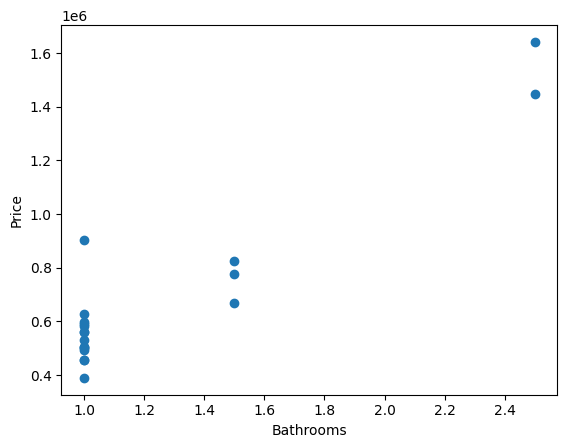

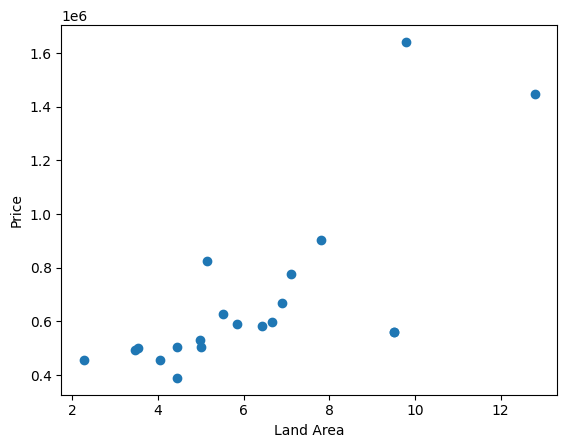

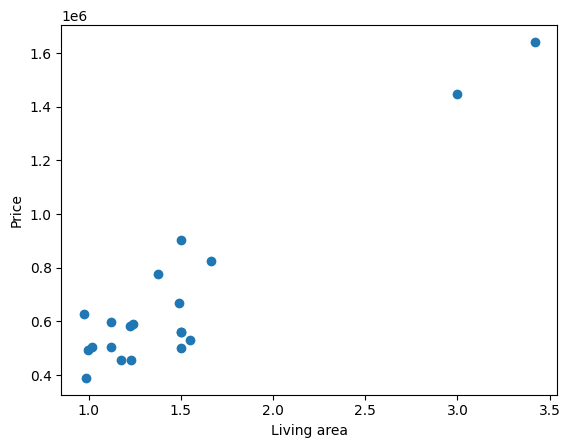

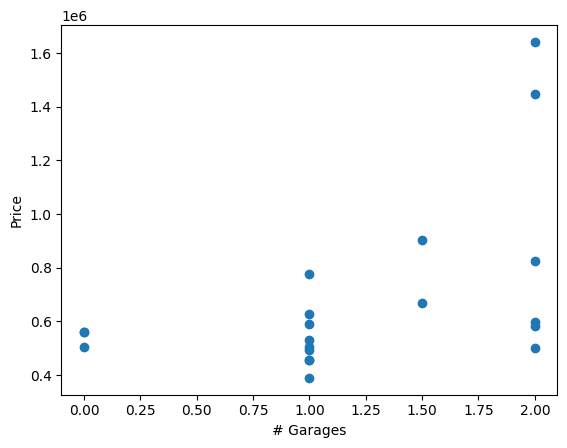

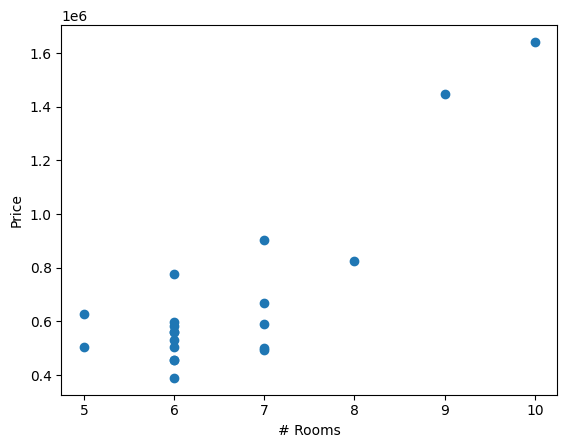

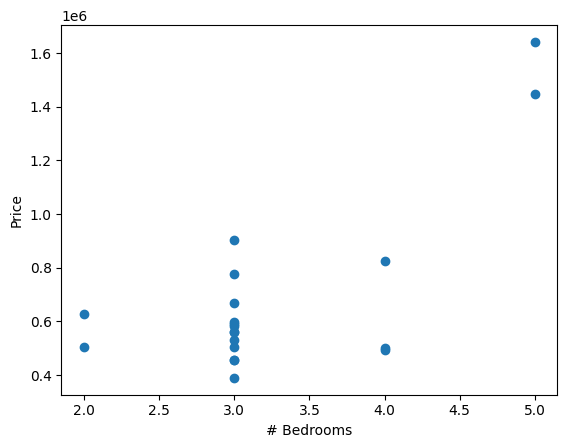

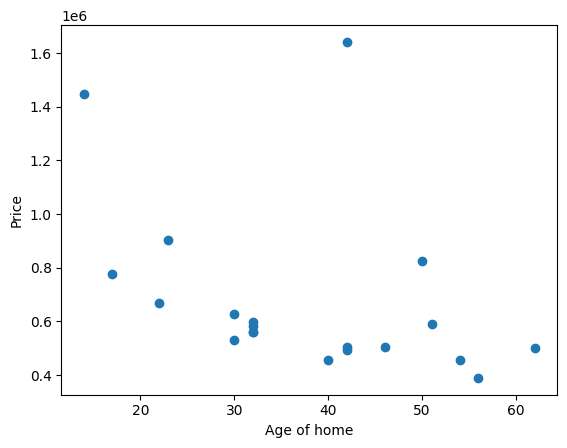

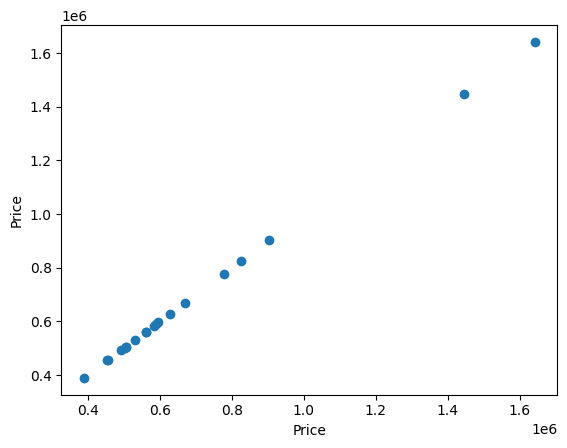

In [21]:
for column in df_train.columns:
    plt.scatter(df_train[column], df_train['Price'])
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

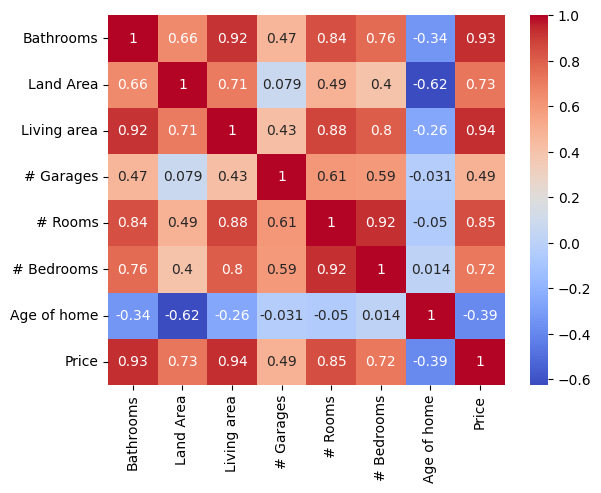

In [22]:
# Correlation Map
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

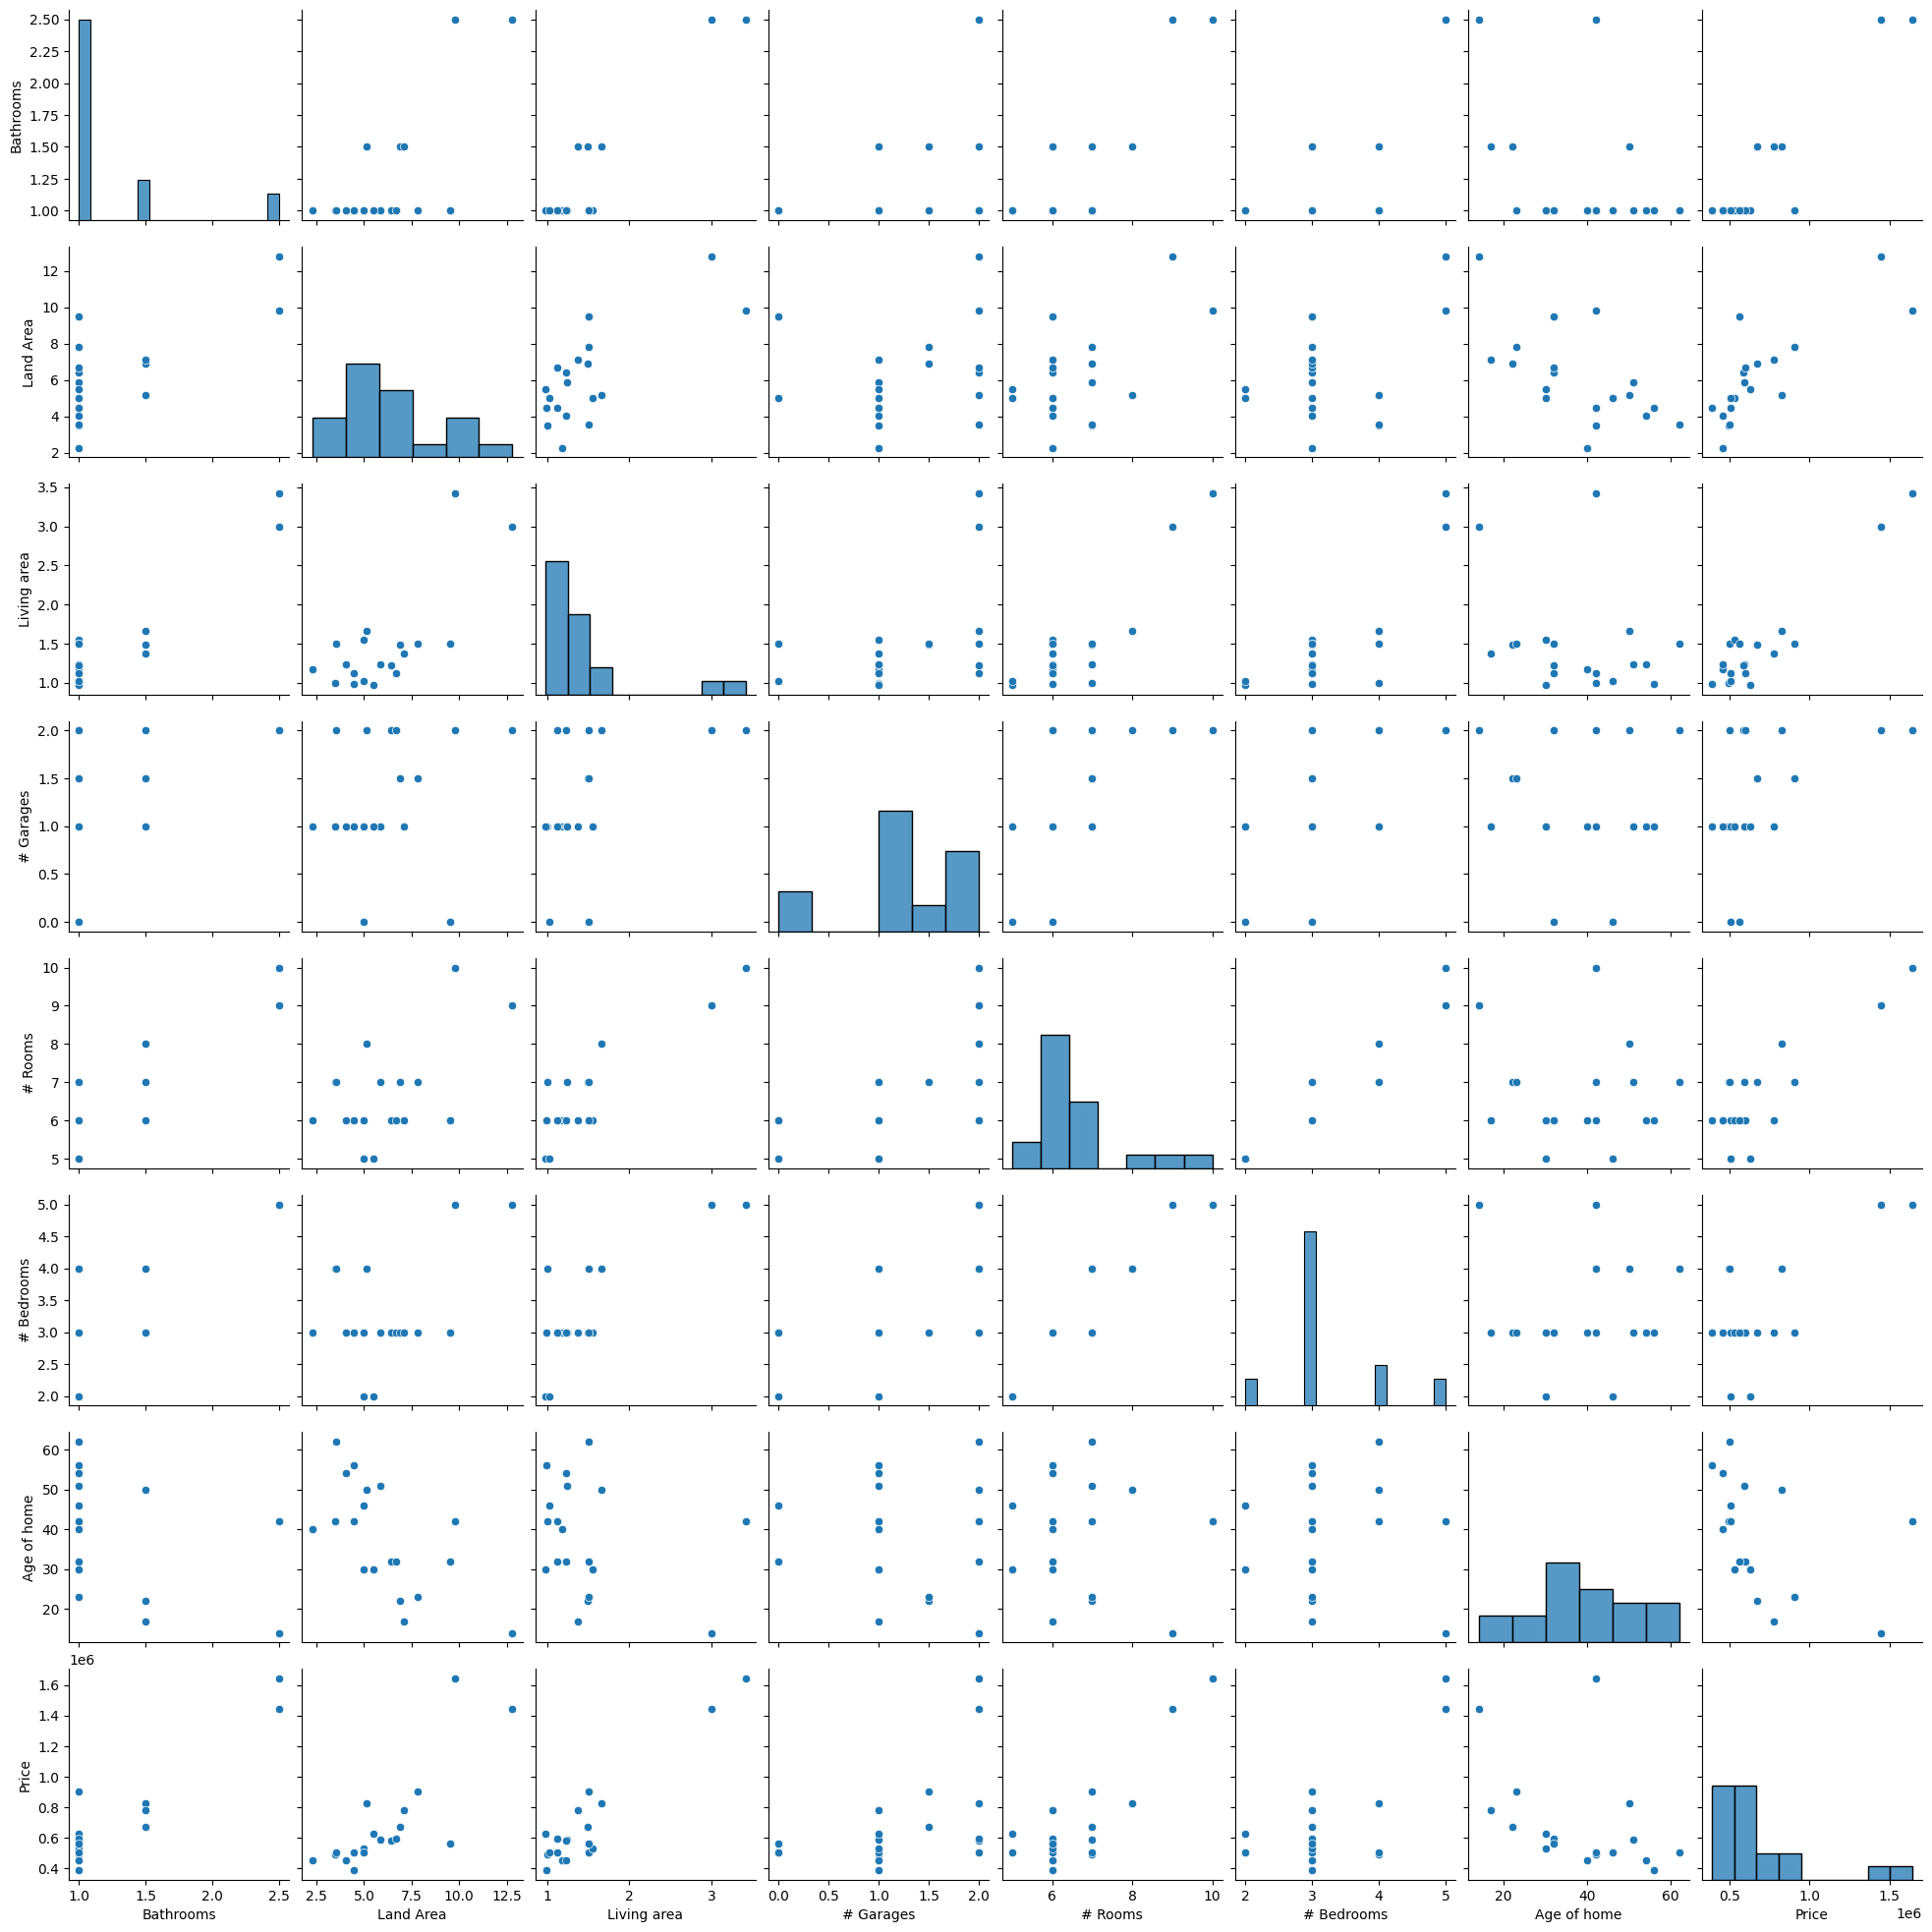

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_train)
plt.show()


### Normal Equations Linear Regression Model

In [161]:
# Formula:
# Price[i] = bias + (w_1 * bathrooms[i]) + (w_2 * Land_Area[i]) + (w_3 * Living_Area[i]) + (w_4 * Garages[i])
# + (w_5 * rooms[i]) + (w_6 * bedrooms[i]) + (w_7 * age_of_home[i])

# 7 parameters
X = df_train[['Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']].values
y = df_train['Price'].values
X = np.column_stack((np.ones(len(X)), X))
print(X)
print(y)

[[ 1.      1.      3.472   0.998   1.      7.      4.     42.    ]
 [ 1.      1.      3.531   1.5     2.      7.      4.     62.    ]
 [ 1.      1.      2.275   1.175   1.      6.      3.     40.    ]
 [ 1.      1.      4.05    1.232   1.      6.      3.     54.    ]
 [ 1.      1.      4.455   1.121   1.      6.      3.     42.    ]
 [ 1.      1.      4.455   0.988   1.      6.      3.     56.    ]
 [ 1.      1.      5.85    1.24    1.      7.      3.     51.    ]
 [ 1.      1.      9.52    1.501   0.      6.      3.     32.    ]
 [ 1.      2.5     9.8     3.42    2.     10.      5.     42.    ]
 [ 1.      2.5    12.8     3.      2.      9.      5.     14.    ]
 [ 1.      1.      6.435   1.225   2.      6.      3.     32.    ]
 [ 1.      1.      4.9883  1.552   1.      6.      3.     30.    ]
 [ 1.      1.      5.52    0.975   1.      5.      2.     30.    ]
 [ 1.      1.      6.666   1.121   2.      6.      3.     32.    ]
 [ 1.      1.      5.      1.02    0.      5.      2.     46. 

In [162]:
# Normal Equation
# Theta = (X^T * X)^-1 * X^T * y

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta)

[-213616.42622039  209185.84518379   10192.81490278  228669.13035842
   47994.95970135  113529.57924219 -151116.11829856   -2133.47365425]


In [163]:
# Testing theta values on first house data
X_test = df_test[['Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']].values
y_test = df_test['Local Price'].values

print(y_test[0])
house_1 = X_test[0]
print(house_1)
print(theta)
house_1 = np.insert(house_1, 0, 1)
print(house_1)
print(house_1.dot(theta))
print(y_test[0])


609310
[ 1.5     6.7265  1.652   1.      6.      3.     44.    ]
[-213616.42622039  209185.84518379   10192.81490278  228669.13035842
   47994.95970135  113529.57924219 -151116.11829856   -2133.47365425]
[ 1.      1.5     6.7265  1.652   1.      6.      3.     44.    ]
728436.953822544
609310


In [187]:
X_test_intercept = np.column_stack((np.ones(len(X_test)), X_test))
y_pred = X_test_intercept.dot(theta)
mse = np.mean((y_pred - y_test) ** 2) / 100000000
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 568.7064173810355


The correlation map says the "Living Area" has the most correlation with the "Price" with a score of .94. This is further supported when plotting this feature against the "Price", which shows a clear linear relationship of a greater living area to a high price on the house. Which makes sense in real life as bigger house are normally more expensive. The following shows just the use of the "Living Area feature".

In [151]:
# Using only "Living Area" Feature
X_living_area = df_train[['Living area']].values
y = df_train['Price'].values
X = np.column_stack((np.ones(len(X_living_area)), X_living_area))

theta_living_area = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta_living_area)

y_pred_living_area = X.dot(theta_living_area)
mse_living_area = np.mean((y_pred_living_area - y) ** 2) / 100000000
print(f"\nMean Squared Error using only Living Area: {mse_living_area}")

[-27219.37595541 478405.49782438]

Mean Squared Error using only Living Area: 122.82616798302179


In [186]:
# Applying theta values of Living Area on test dataset

X_test_living_area = df_test[['Living area']].values
y_test = df_test['Local Price'].values
house_1 = X_test_living_area[0]
house_1 = np.insert(house_1, 0, 1)
predicted = house_1.dot(theta_living_area)

print("Predicted House Price: ", predicted)
print("\nActual House Price: ", y_test[0])

X_test_intercept = np.column_stack((np.ones(len(X_test_living_area)), X_test_living_area))
y_pred = X_test_intercept.dot(theta_living_area)
mse = np.mean((y_pred - y_test) ** 2) / 100000000
print(f"\nMean Squared Error: {mse}")

Predicted House Price:  763106.5064504682

Actual House Price:  609310

Mean Squared Error: 938.9979365635004


Using the correlation map and the individual plots which compare each feature to the price, I've decided to drop the "Age of Home" feature as it has the least correlation to the price, and its comparison plot did not show any visible relationship. According to the correlation map, the score was -.39 for "Age of Home" to "Price", while every other feature was at least .40+.

In [184]:
# Dropping # Age of Home
X = df_train[['Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms']].values
y = df_train['Price'].values
X = np.column_stack((np.ones(len(X)), X))
theta_without_home_age = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta_without_home_age)

y_pred_without_home_age = X.dot(theta_without_home_age)
mse_without_home_age = np.mean((y_pred_without_home_age - y) ** 2) / 100000000
print(f"\nMean Squared Error without Age of Home: {mse_without_home_age}")


[-283508.89549345  247882.06413931   19086.3360315   208278.69747591
   58723.96680887  101084.96880481 -155328.00323094]

Mean Squared Error without Age of Home: 53.180260121980304


In [183]:
# Testing obtained theta values from dropping "Age of Homes" on test test data

X_test_no_home = df_test[['Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms']].values
y_test_no_home = df_test['Local Price'].values
house_1 = X_test_no_home[0]
house_1 = np.insert(house_1, 0, 1)
predicted = house_1.dot(theta_without_home_age)

print("Predicted House Price: ", predicted)
print("\nActual House Price: ", y_test_no_home[0])

X_test_intercept = np.column_stack((np.ones(len(X_test_no_home)), X_test_no_home))
y_pred = X_test_intercept.dot(theta_without_home_age)

# Divided by 100,000,000 to read mse better
mse = np.mean((y_pred - y_test) ** 2) / 100000000
print(f"\nMean Squared Error: {mse}")

Predicted House Price:  760024.6182065377

Actual House Price:  609310

Mean Squared Error: 585.9105855698599


In [181]:
# Best Optimal Features based on correlation: Bathrooms, Land Area, Living area, # Rooms

X_optimal = df_train[['Bathrooms', 'Land Area', 'Living area', '# Rooms']].values
y_optimal = df_train['Price'].values
X_optimal = np.column_stack((np.ones(len(X_optimal)), X_optimal))

theta_optimal = np.linalg.inv(X_optimal.T.dot(X_optimal)).dot(X_optimal.T).dot(y_optimal)
print(theta_optimal)

y_pred_optimal = X_optimal.dot(theta_optimal)
mse_optimal = np.mean((y_pred_optimal - y) ** 2) / 100000000
print(f"\nMean Squared Error using only Optimal Features: {mse_optimal}")

[-285200.50754185  291783.34178272   20387.42149416  152227.4699665
   38715.57049932]

Mean Squared Error using only Optimal Features: 79.1650930657243


Even with the feature "Age of Home" dropped, it still got a relatively close MSE. The orginal parameter values obtained through normal equations obtained a MSE of 568.70 after the scale down (I divided each MSE by 100,000,000 to read the MSE easier).

In [182]:
X_optimal_test = df_test[['Bathrooms', 'Land Area', 'Living area', '# Rooms']].values
y_optimal_test = df_test['Local Price'].values

house_1 = X_optimal_test[0]
house_1 = np.insert(house_1, 0, 1)
predicted = house_1.dot(theta_optimal)
print("Predicted House Price: ", predicted)
print("\nActual House Price: ", y_optimal_test[0])

X_optimal_test = np.column_stack((np.ones(len(X_optimal_test)), X_optimal_test))
y_pred_optimal = X_optimal_test.dot(theta_optimal)

mse_optimal = np.mean((y_pred_optimal - y_optimal_test) ** 2) / 100000000
print(f"\nMean Squared Error using only Optimal Features: {mse_optimal}")

Predicted House Price:  773383.6991933228

Actual House Price:  609310

Mean Squared Error using only Optimal Features: 673.6167497509623


### Question 2 Answers

1. What is the average least squares error for the given data using your simple linear regression model?

The average least squares I've obtained using Normal Equations with all 7 features was 56,870,641,738.10355. This value is extremely large due to the fact the price difference between the predicted and actual are in the tens to hundreds of thousands, and square that value creates a even larger value as shown above. In order to read it easier, I divided each MSE calculation by 100 million, this way the values are easier to read and compare. I didnt use Gradient Descent to get my parameter values due to the small size of the dataset. With only 20 houses to train on, normal equations was the best linear regression model to use.

2. Which factor has the most effect on the final value? How do you know this? Can you use only this feature to predict the price?

According to the plots from above and a correlation matrix comparing each feature to the price, "Living Area" has the most effect on the final value. I know this because the correlation score for "Living Area" to "Price" is .94, the highest of all other featues. The graph comparing just "Living Area" to "Price" shows a visible relationship between the two. A straight line could be drawn to fit the two data. I used a normal equations based linear regression model with only the "Living Area" feature, the MSE calculated was 938.99 (After scaling down by 100 million). This was far larger than the other two methods I used, using all features, and dropping the "worst" feature. I believe this happens because one single feature is impossible to be able to predict a house's price. Although there an underlying relationship with larger houses being more expensive, simply using the feature alone without accounting for all of the other aspects that make a house won't be able to predict a house price precisely. This is why even dropping the "worse" feature had a better MSE than nearly 400 (after scaling).

3. Which factor has the least effect on the final value? How do you know this? What effect does removing this feature have on the performance?

Using the same method as I used from the previous question, I believe the "Age of Homes" feature has the least effect on the final price. It is the only feature with a negative correlation score on the matrix. When plotted against prices, there is no clear or underlying relationship betweent the "Age of Homes" and "Price". The plot shows houses at all prices for all ages, leaving no room for a relationship. I applied the same linear regression models but dropped the "Age of Homes" feature. The model performed slightly worse than using every feature. Dropping the "Age of Homes" feature obtained an MSE of 586 versus the 568 from using all features (after scaling). I'd assumed the model would do better because by dropping this feature, more noise is removed. However, the parameters obtained were only slightly worse than using all features.